In [1]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import numpy as np

# Identification and Description
Big Tech Giants like Google put a spam classifier in their email system to detect whether a recieved email is an important one or a spam by some other company targeted for advertisement. <br>
Whenever a user logs into another site or uses a product using the same account for email then the company pushes promotion with or without consent. <br>
In order to deal with this massive problem, classification and detection is very crucial in order to provide a very good experience to the user and avoid any hassle. <br>

In [2]:
# Importing the data
df = pd.read_csv('datasets/spam.csv', encoding="latin-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3300,spam,RCT' THNQ Adrian for U text. Rgds Vatian,NaN,NaN,NaN
914,ham,"Call me da, i am waiting for your call.",NaN,NaN,NaN
4777,ham,U R THE MOST BEAUTIFUL GIRL IVE EVER SEEN. U R...,NaN,NaN,NaN
4002,ham,somewhere out there beneath the pale moon ligh...,NaN,NaN,NaN
3775,ham,Ok lor. Msg me b4 u call.,NaN,NaN,NaN


# Information about Dataset
The dataset we chose seems to be divided into 5 columns, 
1. v1 -> This column is probably a feature column that identifies if a given text is **spam** or **ham**
2. v2 -> This column contains actual contents of text.
3. Unnamed: 2 -> N/A
4. Unnamed: 3 -> N/A
5. Unnamed: 4 -> N/A

In [5]:
display(df.shape)
display(df.info())
display(df.isna().sum())

(5572, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


None

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

### Shape of Dataset : 5572 rows and 5 columns
### Number of Null values : 5522, 5560 and 5566 in unnamed:2, 3 and 4 respectively
We can see that we have a lot of missing values in the last 3 columns,
Also all of the columns are already classified in all of the data points.

**We have to breakdown the MLA into following steps:**
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Deployment

# Data Cleaning

In [6]:
# Lets check the non-missing values
df[df['Unnamed: 2'].notna()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


We still dont know if the last 3 columns are really useless or not.
Upon closer look, it looks like the text is splitted or is likely a response to the previous message.
So lets try to impute the values with empty string.

In [7]:
df['Unnamed: 2'].fillna('',inplace=True)
df['Unnamed: 3'].fillna('', inplace=True)
df['Unnamed: 4'].fillna('', inplace=True)
df.isna().sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [8]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [9]:
df['v2'] = df['v2']+df['Unnamed: 2']+df['Unnamed: 3']+df['Unnamed: 4']
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",,,
1,ham,Ok lar... Joking wif u oni...,,,
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,,,
3,ham,U dun say so early hor... U c already then say...,,,
4,ham,"Nah I don't think he goes to usf, he lives aro...",,,


In [10]:
display(df.iloc[4668])
df.iloc[4668].v2

v1                                                          ham
v2            When I was born, GOD said, \Oh No! Another IDI...
Unnamed: 2                                             GOD said
Unnamed: 3                     \"OH No! COMPETITION\". Who knew
Unnamed: 4      one day these two will become FREINDS FOREVER!"
Name: 4668, dtype: object

'When I was born, GOD said, \\Oh No! Another IDIOT\\". When you were born GOD said \\"OH No! COMPETITION\\". Who knew one day these two will become FREINDS FOREVER!"'

Cool, now we have concatened the the all columns, now we can drop the remaining columns.

In [11]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [12]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Column names aren't really descriptive, so lets make them more verbose.

In [13]:
# Renaming columns
df.rename(columns={'v1':'Target', 'v2':'Text Content'}, inplace=True)

In [14]:
df.head()

,Target,Text Content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Lets convert the target column into numeric value so that it is easier.

In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [18]:
df['Target'] = encoder.fit_transform(df['Target'])

In [19]:
df.head()

,Target,Text Content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# Check for duplicate values
df.duplicated().sum()

403

In [21]:
df[df.duplicated()]

,Target,Text Content
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


We can see there are **403** duplicate values, lets drop them to prevent errors later on.

In [22]:
# Dropping duplicates
df.drop_duplicates(keep='first',inplace=True)

In [24]:
display(df.duplicated().sum())
df.shape

0

(5169, 2)

# EDA
We perform **Exploratory Data Analysis** to determine what kind of classification or regression algorithm we should apply.

Lets check for the proportion of the spam and ham messages and try to visualize it.

In [25]:
display(df.Target.value_counts(normalize=True))
df.Target.value_counts()

0    0.87367
1    0.12633
Name: Target, dtype: float64

0    4516
1     653
Name: Target, dtype: int64

We can see nearly 87% of the text messages are ham (legitimate) while the reamining 13% is spam. <br>
Numberwise, out of 5169 texts, 4516 is ham and 653 is spam.

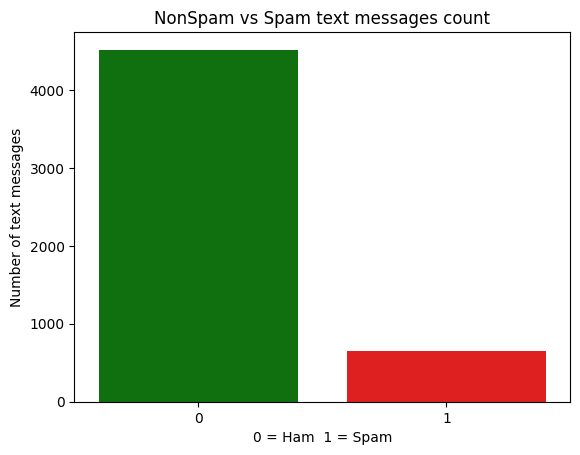

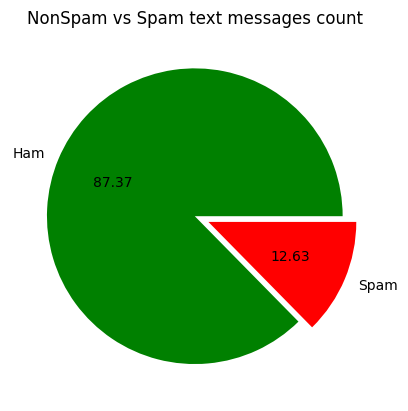

In [38]:
palette_color = ['green','red']
sns.countplot(x='Target', data=df, palette=palette_color)
plt.xlabel("0 = Ham  1 = Spam")
plt.ylabel("Number of text messages")
plt.title("NonSpam vs Spam text messages count")
plt.show()

explode = [0, 0.1]
plt.pie(df['Target'].value_counts(), colors=palette_color, labels=['Ham','Spam'], autopct='%0.2f',explode=explode)
plt.title("NonSpam vs Spam text messages count")
plt.show()


Data is imbalance. The proportion are not really equal.

We now analyze: <br>
1. Number of characters in SMS
2. Number of words in SMS
3. Number of sentences in SMS

In [39]:
import nltk

In [42]:
df['numberOfCharacters']=df['Text Content'].apply(len)

In [43]:
df.head()

,Target,Text Content,numberOfCharacters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [54]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\xarad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [55]:
from nltk.tokenize import word_tokenize
word_tokenize('Hello this is a sentence')

['Hello', 'this', 'is', 'a', 'sentence']

In [58]:
# Number of words
df['numberOfWords'] = df['Text Content'].apply(lambda x: len(nltk.word_tokenize(x)))

In [59]:
df.head()

,Target,Text Content,numberOfCharacters,numberOfWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [60]:
# Number of sentences
from nltk.tokenize import sent_tokenize
df['numberOfSentences'] = df['Text Content'].apply(lambda x: len(sent_tokenize(x)))

In [61]:
df.head()

,Target,Text Content,numberOfCharacters,numberOfWords,numberOfSentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


Now, lets perform EDA on the new columns

In [69]:
df_wordInfo = df.iloc[:,[2,3,4]]
df_wordInfo.head()

,numberOfCharacters,numberOfWords,numberOfSentences
0,111,24,2
1,29,8,2
2,155,37,2
3,49,13,1
4,61,15,1


In [70]:
df_wordInfo.describe()

,numberOfCharacters,numberOfWords,numberOfSentences
count,5169.000000,5169.000000,5169.000000
mean,79.527762,18.591797,1.971948
std,58.467143,13.386048,1.456472
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,119.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


We can get the following data from the above table:<br>
**Mean**: 80 characters, 19 words and 2 sentences on each text<br>
**Max**: 910 characters, 220 words, 38 sentences

In [73]:
# Performing on both spammy and hammy texts
spam = df[df['Target']==1]
ham = df[df['Target']==0]

print("HAM'S SUMMARY STATISTICS:")
display(ham.iloc[:,[2,3,4]].describe().round(2))
print('\n')

print("SPAM'S SUMMARY STATISTICS:")
display(spam.iloc[:,[2,3,4]].describe().round(2))

HAM'S SUMMARY STATISTICS:


,numberOfCharacters,numberOfWords,numberOfSentences
count,4516.00,4516.00,4516.00
mean,71.05,17.27,1.83
std,56.70,13.57,1.39
min,2.00,1.00,1.00
25%,34.00,8.00,1.00
50%,53.00,13.00,1.00
75%,92.00,22.00,2.00
max,910.00,220.00,38.00




SPAM'S SUMMARY STATISTICS:


,numberOfCharacters,numberOfWords,numberOfSentences
count,653.00,653.00,653.00
mean,138.16,27.75,2.98
std,29.92,6.98,1.49
min,13.00,2.00,1.00
25%,132.00,25.00,2.00
50%,149.00,29.00,3.00
75%,157.00,32.00,4.00
max,224.00,46.00,9.00


We can see that spammy messages are relatively longer with mean value of 139 characters, 28 words and 3 sentences <br>
Whereas, in hammy messages they are relatively shorter with mean value of 71 characters, 17 words and 2 sentences

***Lets plot and see the results:***

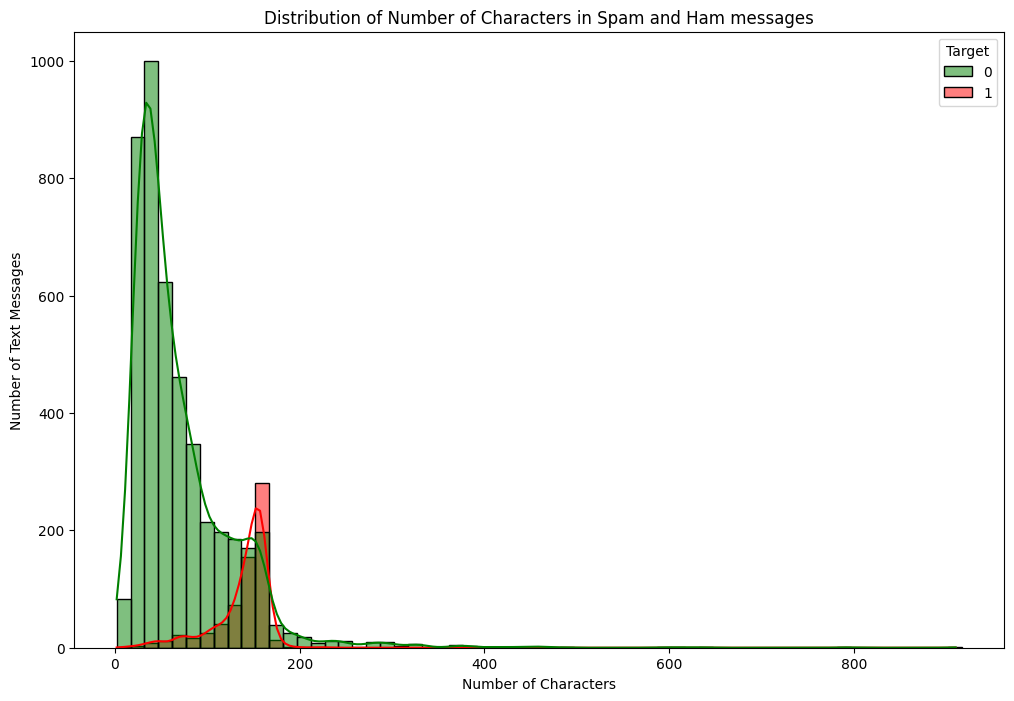

In [88]:
# Plotting histograms for number of characters
plt.figure(figsize=(12,8))
sns.histplot(x=df['numberOfCharacters'],binwidth=15,hue=df.Target, palette=['green','red'], kde=True)
plt.xlabel('Number of Characters')
plt.ylabel("Number of Text Messages")
plt.title("Distribution of Number of Characters in Spam and Ham messages")
plt.show()

We can see that the Spam messages have **higher number of characters** in the range of 200.

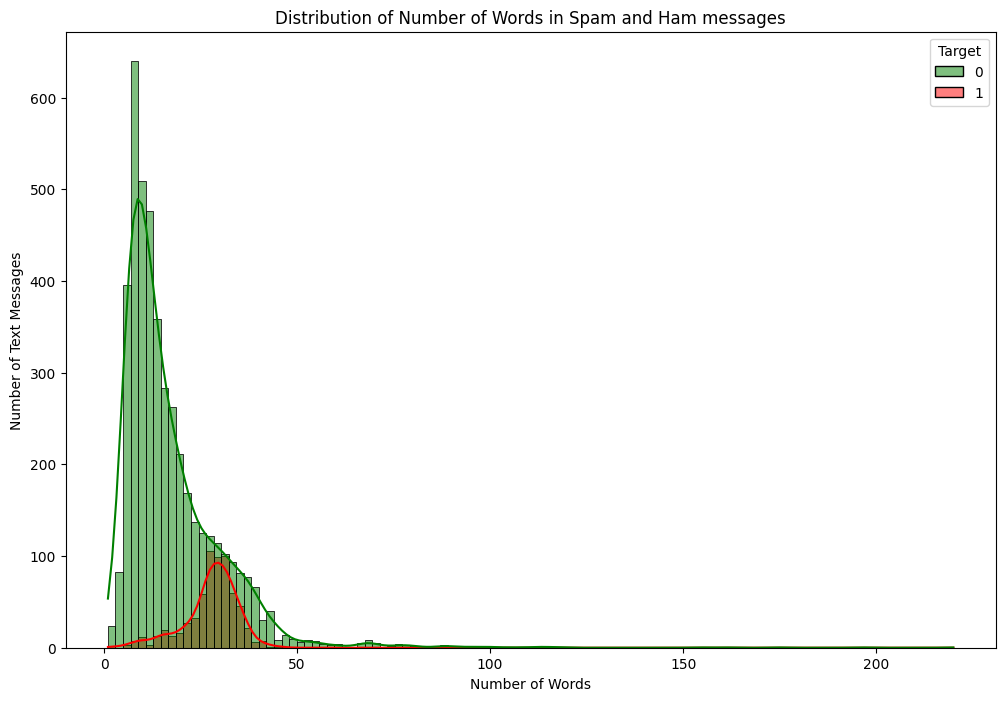

In [91]:
# Plotting histograms for number of words
plt.figure(figsize=(12, 8))
sns.histplot(x=df['numberOfWords'],
             hue=df.Target, palette=['green', 'red'], kde=True)
plt.xlabel('Number of Words')
plt.ylabel("Number of Text Messages")
plt.title("Distribution of Number of Words in Spam and Ham messages")
plt.show()


We can see that the Spam messages have **higher number of words** in the range of 50.

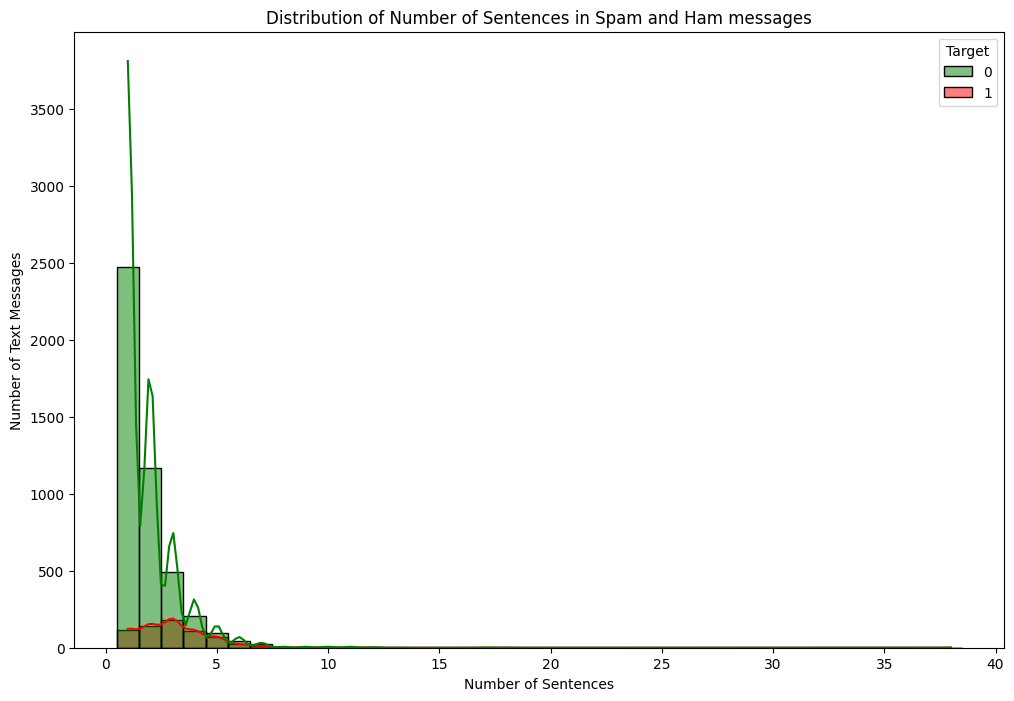

In [94]:
# Plotting histograms for number of sentences
plt.figure(figsize=(12, 8))
sns.histplot(x=df['numberOfSentences'],discrete=True,
             hue=df.Target, palette=['green', 'red'], kde=True)
plt.xlabel('Number of Sentences')
plt.ylabel("Number of Text Messages")
plt.title("Distribution of Number of Sentences in Spam and Ham messages")
plt.show()


Number of sentences dont really differ in characteristics.

Lets see the relation between the characters, words and sentences.

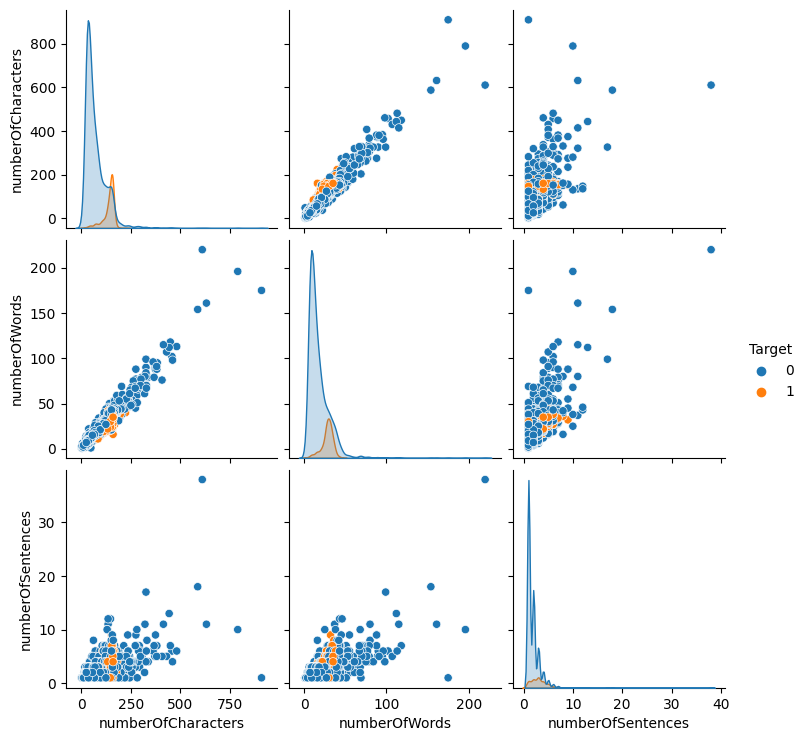

In [99]:
sns.pairplot(data=df,hue='Target')
plt.show()

We cannot draw better conclusion, but we can see that there are many outliers in the data in both spam and ham messages.

Now lets calculate the correlation between variables.

,Target,numberOfCharacters,numberOfWords,numberOfSentences
Target,1.000000,0.381395,0.260194,0.262834
numberOfCharacters,0.381395,1.000000,0.965651,0.622170
numberOfWords,0.260194,0.965651,1.000000,0.679095
numberOfSentences,0.262834,0.622170,0.679095,1.000000


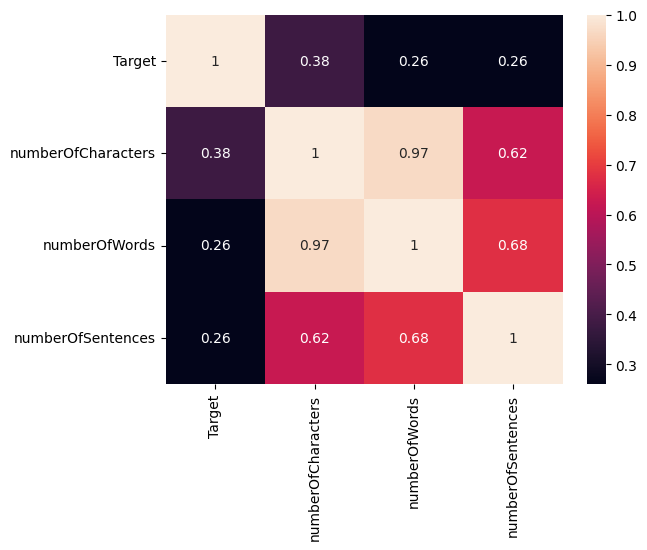

In [104]:
display(df.corr(numeric_only=True).style.background_gradient())
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

We can see that there is high correlation between *Target* and *numberOfCharacters*, so we would keep that only in calculating models later on.

# Text Preprocessing
We use the following series of steps for data/text preprocessing:
1. LowerCasing
2. Tokenization
3. Removing Special characters
4. Removing stopwords and punctuation
5. Stemming/Lametization

## Function for all:
Lets make a function that performs all of the above steps to make our life easier.

In [117]:
# Checking the stemmers
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer

ps = PorterStemmer()
ls = LancasterStemmer()
ss = SnowballStemmer(language='english')

text = "dance dancer dances dancing dancerina danced"
display(ps.stem(text))
display(ls.stem(text))
display(ss.stem(text))
display(ss.stem(text))

'dance dancer dances dancing dancerina danc'

'dance dancer dances dancing dancerina danced'

'dance dancer dances dancing dancerina danc'

'dance dancer dances dancing dancerina danc'

Lets use the PorterStemmer stemming function

In [121]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\xarad\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [128]:
# Function for text preprocessing
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
def preprocess(text:str):
    # Converting to lowercase
    text = text.lower()
    
    # Tokenization
    textToken = []
    textToken = nltk.word_tokenize(text,)

    # Removing special characters
    alphanum = []
    for word in textToken:
        if word.isalnum():
            alphanum.append(word)

    # stemming
    stemlist = []
    ps = PorterStemmer()
    for word in alphanum:
        stemlist.append(ps.stem(word))
    
    # Removing stop words
    nonStopList = []
    for word in stemlist:
        if word not in stopwords.words('english') and word not in string.punctuation:
            nonStopList.append(word)
    return " ".join(nonStopList)

preprocess('HELLO WORLD loving dance and in for of at dances dancing dancer#+-:;\'')
preprocess('I loved YT LeCtures on Machine Learning, How about you?')
preprocess(df.iloc[0]['Text Content'])

'go jurong point crazi avail onli bugi n great world la e buffet cine got amor wat'

Now lets apply this, and lets print wordclouds used in spam and ham 

In [129]:
df['text']=df['Text Content'].apply(preprocess)

In [130]:
df.sample(8)

,Target,Text Content,numberOfCharacters,numberOfWords,numberOfSentences,text
5060,0,"Sorry, I'll call you later. I am in meeting sir.",49,14,2,sorri call later meet sir
545,0,Then any special there?,23,5,1,ani special
2324,0,Ok lor.,7,3,1,ok lor
1957,0,Take something for pain. If it moves however t...,87,20,2,take someth pain move howev ani side next 6hr ...
3031,0,Jokin only lar... :-) depends on which phone m...,69,17,1,jokin onli lar depend phone father get lor
2127,0,Tessy..pls do me a favor. Pls convey my birthd...,113,26,3,tessi pl favor pl convey birthday wish nimya p...
2231,0,"K, wen ur free come to my home and also tel vi...",130,34,2,k wen ur free come home also tel vikki hav sen...
521,0,Shall i come to get pickle,26,6,1,shall come get pickl


In [138]:
# Making a wordcloud for spam messages
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='black')

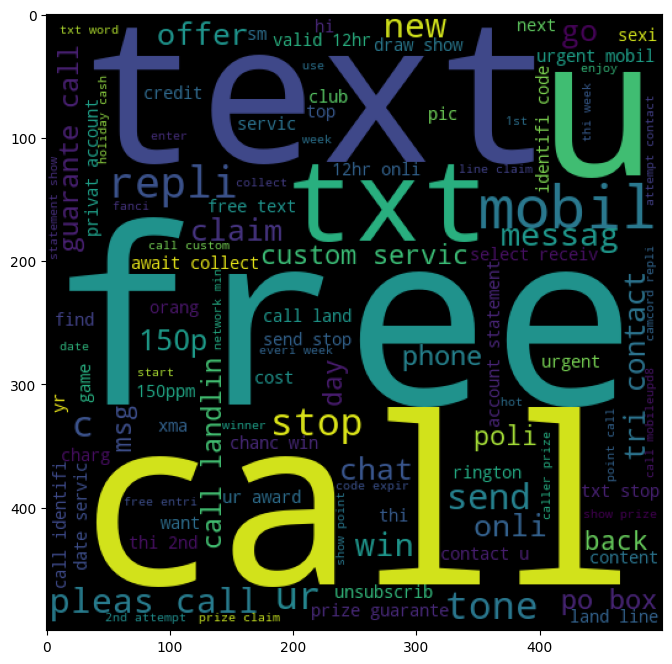

In [140]:
plt.figure(figsize=(12,8))
spam_wc = wc.generate(df[df['Target']==1]['text'].str.cat(sep=" "))
plt.imshow(spam_wc)

We can see the most common words are related to sales like **mobil**, **call**, **free** etc. which is true for most cases

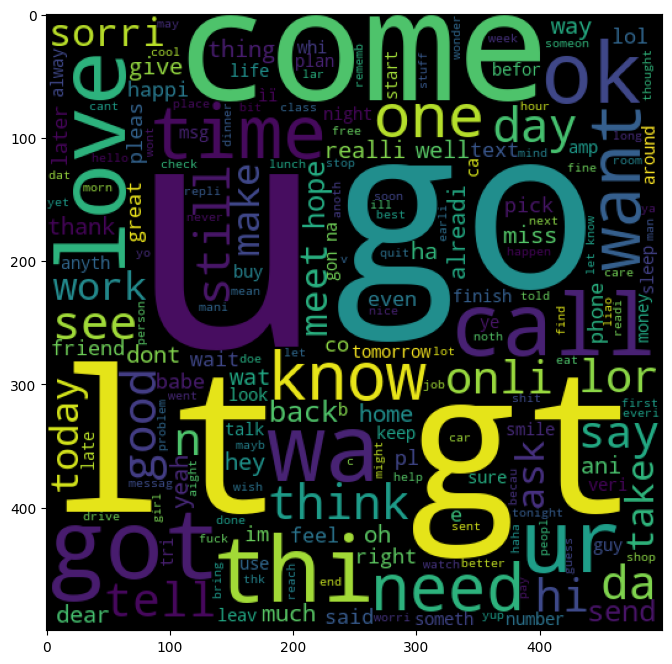

In [141]:
# Checking for non-spam messages
plt.figure(figsize=(12, 8))
ham_wc = wc.generate(df[df['Target'] == 0]['text'].str.cat(sep=" "))
plt.imshow(ham_wc)


This is random and is organic word wise, it is really random.
Lets try to visualize the top words used in spam.

In [150]:
from collections import Counter
spam_corpus =[]
spam = df[df['Target']==1]
for words in spam['text'].tolist():
        for word in words.split(' '):
            spam_corpus.append(word)

display(len(spam_corpus))

10187

There are 10187 various words used in spammy messages

In [152]:
wordCount = Counter(spam_corpus).most_common(30)
wordCount

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 106),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('thi', 82),
 ('get', 74),
 ('onli', 66),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 61),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45)]

These are the most common words used in spammy messages. Lets plot in a graph

In [153]:
words_df = pd.DataFrame(wordCount)
words_df.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


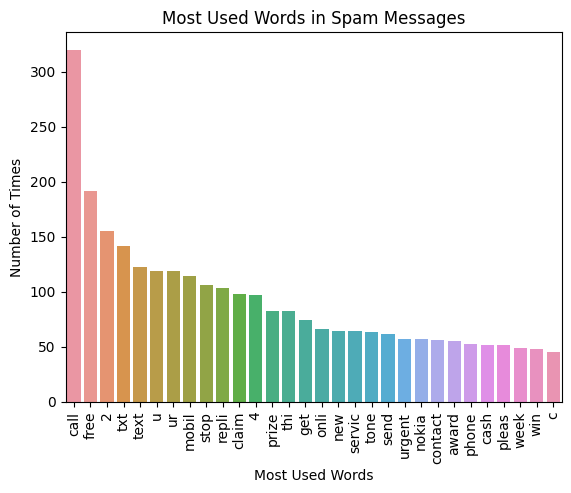

In [158]:
sns.barplot(x=0, y=1, data=words_df)
plt.xlabel('Most Used Words')
plt.ylabel('Number of Times')
plt.title("Most Used Words in Spam Messages")
plt.xticks(rotation='vertical')
plt.show()

Lets do the same for ham messages

36722

[('u', 892),
 ('go', 407),
 ('get', 349),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 237),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('thi', 234),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('wa', 216),
 ('good', 215),
 ('want', 209),
 ('ur', 202),
 ('day', 191),
 ('need', 171),
 ('hi', 168),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 144),
 ('still', 144)]

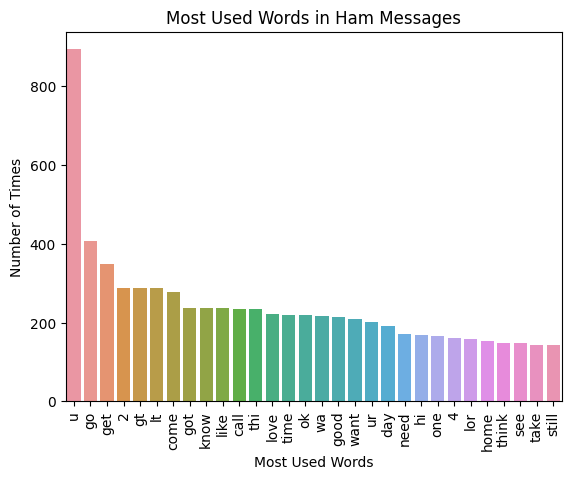

In [160]:
ham_corpus =[]
ham = df[df['Target']==0]
for words in ham['text'].tolist():
        for word in words.split(' '):
            ham_corpus.append(word)

display(len(ham_corpus))
wordCount = Counter(ham_corpus).most_common(30)
display(wordCount)

wordsHam_df = pd.DataFrame(wordCount)
wordsHam_df.head()

sns.barplot(x=0, y=1, data=wordsHam_df)
plt.xlabel('Most Used Words')
plt.ylabel('Number of Times')
plt.title("Most Used Words in Ham Messages")
plt.xticks(rotation='vertical')
plt.show()


These are the most used words in the hammy messages.

# Model Building
We use **Naive Bayes** algorithm because it is the best performer in textual data.
Later on we would use other algorithms too.

For that we would have to vectorize the words using a number of methods like:
1. bag of words
2. TFIDF
3. WordToVec

## Bag of Words


In [161]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [166]:
X = cv.fit_transform(df['text']).toarray()
display(X)
X.shape

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

(5169, 6774)

In [165]:
y = df['Target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [168]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [181]:
# Function to print all accuracy metrics
def modelEvaluate(model, modelName):
    print(f"{modelName}:")
    print("---------------------------")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Accuracy Score: {accuracy_score(y_test, y_pred).round(4)}')
    print(f'Conusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'Precision Score: {precision_score(y_test, y_pred).round(4)}')
    print("\n")

modelEvaluate(gnb, "Gaussian Naive Bayes")
modelEvaluate(mnb, "Multinomial Naive Bayes")
modelEvaluate(bnb, "Bernoulli Naive Bayes")

Gaussian Naive Bayes:
---------------------------
Accuracy Score: 0.8733
Conusion Matrix:
[[771 117]
 [ 14 132]]
Precision Score: 0.5301


Multinomial Naive Bayes:
---------------------------
Accuracy Score: 0.9691
Conusion Matrix:
[[869  19]
 [ 13 133]]
Precision Score: 0.875


Bernoulli Naive Bayes:
---------------------------
Accuracy Score: 0.9691
Conusion Matrix:
[[882   6]
 [ 26 120]]
Precision Score: 0.9524




Out of all, the **Bernoulli Naive Bayes** model has highest accuracy and highest precision score.

## TFIDF

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [184]:
X = tfidf.fit_transform(df['text']).toarray()
y = df['Target'].values
display(X)
display(X.shape)
display(y)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(5169, 6774)

array([0, 0, 1, ..., 0, 0, 0])

In [185]:
# Fitting the model again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [186]:
# Evaluating the performances again
modelEvaluate(gnb, "Gaussian Naive Bayes")
modelEvaluate(mnb, "Multinomial Naive Bayes")
modelEvaluate(bnb, "Bernoulli Naive Bayes")

Gaussian Naive Bayes:
---------------------------
Accuracy Score: 0.8685
Conusion Matrix:
[[770 118]
 [ 18 128]]
Precision Score: 0.5203


Multinomial Naive Bayes:
---------------------------
Accuracy Score: 0.9536
Conusion Matrix:
[[888   0]
 [ 48  98]]
Precision Score: 1.0


Bernoulli Naive Bayes:
---------------------------
Accuracy Score: 0.9691
Conusion Matrix:
[[882   6]
 [ 26 120]]
Precision Score: 0.9524




There is a huge jump in precision in the **MultiNomial Naive Bayes** model even though the accuracy is little lower than previous metrics.

Since, precision is which matters here, it has no false detection of spams, we would use 
### TFIDF
&
### Multinomial Naive Bayes

for the time being.

Now lets compare this with other machine learning algorithms

In [196]:
# Importing other machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [216]:
# Making hyperparameters
svc = LinearSVC()
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [217]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}


In [220]:
# Making a function to print accuracy and precision
def train_classifier(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred).round(4)
    precision = precision_score(y_test, y_pred).round(4)
    return accuracy, precision

train_classifier(svc)

(0.9739, 0.9837)

In [222]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf)
    print(f'{name}')
    print('---------------')
    print(f'Accuracy Score: {current_accuracy}')
    print(f'Precision Score: {current_precision}')
    print('\n')

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

SVC
---------------
Accuracy Score: 0.9739
Precision Score: 0.9837


KN
---------------
Accuracy Score: 0.8888
Precision Score: 1.0


NB
---------------
Accuracy Score: 0.9536
Precision Score: 1.0


DT
---------------
Accuracy Score: 0.9323
Precision Score: 0.8016


LR
---------------
Accuracy Score: 0.9478
Precision Score: 0.934


RF
---------------
Accuracy Score: 0.9623
Precision Score: 0.9908


AdaBoost
---------------
Accuracy Score: 0.9584
Precision Score: 0.9256


BgC
---------------
Accuracy Score: 0.9574
Precision Score: 0.9113


ETC
---------------
Accuracy Score: 0.9691
Precision Score: 0.9831


GBDT
---------------
Accuracy Score: 0.9478
Precision Score: 0.96


xgb
---------------
Accuracy Score: 0.9642
Precision Score: 0.9739




Adding all these values into a dataframe for easier analysis

In [224]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.9739,0.9837
1,KN,0.8888,1.0000
2,NB,0.9536,1.0000
3,DT,0.9323,0.8016
4,LR,0.9478,0.9340
5,RF,0.9623,0.9908
6,AdaBoost,0.9584,0.9256
7,BgC,0.9574,0.9113
8,ETC,0.9691,0.9831
9,GBDT,0.9478,0.9600


Lets try to visualize this

In [225]:
performance_df_categorized = pd.melt(performance_df, id_vars='Algorithm')
performance_df_categorized

,Algorithm,variable,value
0,SVC,Accuracy,0.9739
1,KN,Accuracy,0.8888
2,NB,Accuracy,0.9536
3,DT,Accuracy,0.9323
4,LR,Accuracy,0.9478
5,RF,Accuracy,0.9623
6,AdaBoost,Accuracy,0.9584
7,BgC,Accuracy,0.9574
8,ETC,Accuracy,0.9691
9,GBDT,Accuracy,0.9478


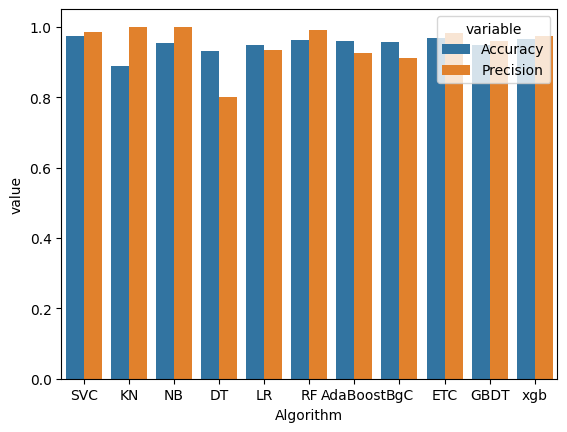

In [231]:
# plt.figure(figsize=(,16))
g = sns.barplot(x='Algorithm',y='value', hue='variable', data=performance_df_categorized)
plt.show()

In [233]:
performance_df.sort_values(by=['Precision','Accuracy'], ascending=False)

,Algorithm,Accuracy,Precision
2,NB,0.9536,1.0000
1,KN,0.8888,1.0000
5,RF,0.9623,0.9908
0,SVC,0.9739,0.9837
8,ETC,0.9691,0.9831
10,xgb,0.9642,0.9739
9,GBDT,0.9478,0.9600
4,LR,0.9478,0.9340
6,AdaBoost,0.9584,0.9256
7,BgC,0.9574,0.9113


Here, we have three options: <br>
NB <br>
SVM <br>
RandomForest<br>
Lets try to improve the performance of model:
1. Changing the parameter of max_features in tfidf
2. Making the proportion of spam and ham equal
3. Adding the number of words feature into the model

In [234]:
# Changing the max_features hyperparameter of tfidf vecrorizer
tfidf = TfidfVectorizer(max_features=4000)
X = tfidf.fit_transform(df['text']).toarray()
y = df['Target'].values
display(X)
display(X.shape)
display(y)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

(5169, 4000)

array([0, 0, 1, ..., 0, 0, 0])

In [235]:
# Fitting the model again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

In [243]:
# Evaluating the performances again
modelEvaluate(mnb, "Multinomial Naive Bayes")
modelEvaluate(bnb, "Bernoulli Naive Bayes")


Multinomial Naive Bayes:
---------------------------
Accuracy Score: 0.9691
Conusion Matrix:
[[888   0]
 [ 32 114]]
Precision Score: 1.0


Bernoulli Naive Bayes:
---------------------------
Accuracy Score: 0.9778
Conusion Matrix:
[[883   5]
 [ 18 128]]
Precision Score: 0.9624




In [245]:
# Changing the max_features hyperparameter of tfidf vecrorizer
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()
# Fitting the model again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)
# Evaluating the performances again
modelEvaluate(mnb, "Multinomial Naive Bayes")
modelEvaluate(bnb, "Bernoulli Naive Bayes")

# Changing the max_features hyperparameter of tfidf vecrorizer
tfidf = TfidfVectorizer(max_features=3200)
X = tfidf.fit_transform(df['text']).toarray()
# Fitting the model again
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)
# Evaluating the performances again
modelEvaluate(mnb, "Multinomial Naive Bayes")
modelEvaluate(bnb, "Bernoulli Naive Bayes")


Multinomial Naive Bayes:
---------------------------
Accuracy Score: 0.9691
Conusion Matrix:
[[888   0]
 [ 32 114]]
Precision Score: 1.0


Bernoulli Naive Bayes:
---------------------------
Accuracy Score: 0.9778
Conusion Matrix:
[[883   5]
 [ 18 128]]
Precision Score: 0.9624


Multinomial Naive Bayes:
---------------------------
Accuracy Score: 0.9681
Conusion Matrix:
[[888   0]
 [ 33 113]]
Precision Score: 1.0


Bernoulli Naive Bayes:
---------------------------
Accuracy Score: 0.9768
Conusion Matrix:
[[882   6]
 [ 18 128]]
Precision Score: 0.9552




In [262]:
# Finding the overfitting point
accuracies = []
precisions = []
for i in range(1000,6000,250):
    tfidf = TfidfVectorizer(max_features=i)
    X = tfidf.fit_transform(df['text']).toarray()
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123)
    bnb.fit(X_train, y_train)
    y_pred = bnb.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred).round(4))
    precisions.append(precision_score(y_test, y_pred).round(4))
print(accuracies)
print(precisions)
max_features = np.arange(1000,6000,250)
max_features


[0.9729, 0.9729, 0.9758, 0.9758, 0.9778, 0.9768, 0.9768, 0.9778, 0.9778, 0.9778, 0.9768, 0.9778, 0.9787, 0.9787, 0.9768, 0.9749, 0.9758, 0.972, 0.972, 0.971]
[0.9338, 0.947, 0.9481, 0.9481, 0.9556, 0.9485, 0.9485, 0.9556, 0.9624, 0.9624, 0.9621, 0.9695, 0.9697, 0.9697, 0.9692, 0.9688, 0.9764, 0.9606, 0.9606, 0.9531]


array([1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500,
       3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750])

In [253]:
bnb_metrics = pd.DataFrame({'Max_Features':max_features,'Accuracies':accuracies,'Precisions':precisions})
bnb_metrics

,Max_Features,Accuracies,Precisions
0,1000,0.9729,0.9338
1,1250,0.9729,0.9470
2,1500,0.9758,0.9481
3,1750,0.9758,0.9481
4,2000,0.9778,0.9556
5,2250,0.9768,0.9485
6,2500,0.9768,0.9485
7,2750,0.9778,0.9556
8,3000,0.9778,0.9624
9,3250,0.9778,0.9624


In [256]:
bnb_melt = pd.melt(bnb_metrics, id_vars='Max_Features')
bnb_melt.sort_values(by=['Max_Features'])

,Max_Features,variable,value
0,1000,Accuracies,0.9729
20,1000,Precisions,0.9338
1,1250,Accuracies,0.9729
21,1250,Precisions,0.9470
2,1500,Accuracies,0.9758
22,1500,Precisions,0.9481
3,1750,Accuracies,0.9758
23,1750,Precisions,0.9481
4,2000,Accuracies,0.9778
24,2000,Precisions,0.9556


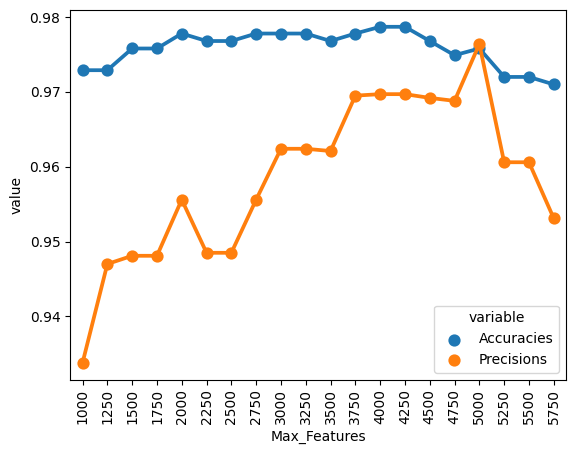

In [272]:
# Lets check the overfitting point
sns.pointplot(x='Max_Features', hue='variable', y='value', data=bnb_melt)
plt.xticks(rotation='vertical')
plt.show()

The overfit point for BNB is around 4000 range.

In [266]:
# Checking for MNB
# Finding the overfitting point
accuracies = []
precisions = []
for i in range(1000, 6000, 250):
    tfidf = TfidfVectorizer(max_features=i)
    X = tfidf.fit_transform(df['text']).toarray()
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123)
    mnb.fit(X_train, y_train)
    y_pred = mnb.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred).round(4))
    precisions.append(precision_score(y_test, y_pred).round(4))
print(accuracies)
print(precisions)
max_features = np.arange(1000, 6000, 250)
max_features

[0.9729, 0.9729, 0.9729, 0.97, 0.971, 0.971, 0.97, 0.9691, 0.9691, 0.9671, 0.9671, 0.9662, 0.9632, 0.9632, 0.9623, 0.9613, 0.9603, 0.9574, 0.9565, 0.9555]
[0.9836, 0.9917, 0.9917, 0.9915, 0.9915, 0.9915, 0.9915, 0.9914, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


array([1000, 1250, 1500, 1750, 2000, 2250, 2500, 2750, 3000, 3250, 3500,
       3750, 4000, 4250, 4500, 4750, 5000, 5250, 5500, 5750])

In [267]:
mnb_metrics = pd.DataFrame(
    {'Max_Features': max_features, 'Accuracies': accuracies, 'Precisions': precisions})
mnb_metrics


,Max_Features,Accuracies,Precisions
0,1000,0.9729,0.9836
1,1250,0.9729,0.9917
2,1500,0.9729,0.9917
3,1750,0.9700,0.9915
4,2000,0.9710,0.9915
5,2250,0.9710,0.9915
6,2500,0.9700,0.9915
7,2750,0.9691,0.9914
8,3000,0.9691,1.0000
9,3250,0.9671,1.0000


In [268]:
mnb_melt = pd.melt(mnb_metrics, id_vars='Max_Features')
mnb_melt.sort_values(by=['Max_Features'])

,Max_Features,variable,value
0,1000,Accuracies,0.9729
20,1000,Precisions,0.9836
1,1250,Accuracies,0.9729
21,1250,Precisions,0.9917
2,1500,Accuracies,0.9729
22,1500,Precisions,0.9917
3,1750,Accuracies,0.9700
23,1750,Precisions,0.9915
4,2000,Accuracies,0.9710
24,2000,Precisions,0.9915


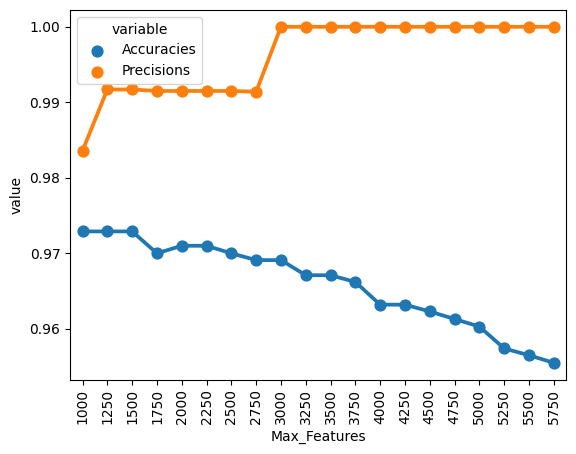

In [275]:
# Lets check the overfitting point
sns.pointplot(x='Max_Features', hue='variable', y='value', data=mnb_melt)
plt.xticks(rotation='vertical')
plt.show()


The overfitting point is **3000** <br>
So lets take the value of max_features at 3000 and check accuracies for all other algorithms

In [273]:
accuracy_scores = []
precision_scores = []

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf)
    print(f'{name}')
    print('---------------')
    print(f'Accuracy Score: {current_accuracy}')
    print(f'Precision Score: {current_precision}')
    print('\n')

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


SVC
---------------
Accuracy Score: 0.9749
Precision Score: 0.9762


KN
---------------
Accuracy Score: 0.9004
Precision Score: 1.0


NB
---------------
Accuracy Score: 0.9691
Precision Score: 1.0


DT
---------------
Accuracy Score: 0.9342
Precision Score: 0.8482


LR
---------------
Accuracy Score: 0.9449
Precision Score: 0.9159


RF
---------------
Accuracy Score: 0.9662
Precision Score: 0.9912


AdaBoost
---------------
Accuracy Score: 0.9662
Precision Score: 0.9512


BgC
---------------
Accuracy Score: 0.9545
Precision Score: 0.896


ETC
---------------
Accuracy Score: 0.9729
Precision Score: 0.9836


GBDT
---------------
Accuracy Score: 0.9487
Precision Score: 0.9604


xgb
---------------
Accuracy Score: 0.9603
Precision Score: 0.9339




In [276]:
performance_df['Accuracy_max_features_3000']=accuracy_scores
performance_df['Precision_max_features_3000']=precision_scores


,Algorithm,Accuracy,Precision,Accuracy_max_features_3000,Precision_max_features_3000
0,SVC,0.9739,0.9837,0.9749,0.9762
1,KN,0.8888,1.0000,0.9004,1.0000
2,NB,0.9536,1.0000,0.9691,1.0000
3,DT,0.9323,0.8016,0.9342,0.8482
4,LR,0.9478,0.9340,0.9449,0.9159
5,RF,0.9623,0.9908,0.9662,0.9912
6,AdaBoost,0.9584,0.9256,0.9662,0.9512
7,BgC,0.9574,0.9113,0.9545,0.8960
8,ETC,0.9691,0.9831,0.9729,0.9836
9,GBDT,0.9478,0.9600,0.9487,0.9604


In [277]:
performance_df.sort_values(by='Precision', ascending=False)


,Algorithm,Accuracy,Precision,Accuracy_max_features_3000,Precision_max_features_3000
1,KN,0.8888,1.0000,0.9004,1.0000
2,NB,0.9536,1.0000,0.9691,1.0000
5,RF,0.9623,0.9908,0.9662,0.9912
0,SVC,0.9739,0.9837,0.9749,0.9762
8,ETC,0.9691,0.9831,0.9729,0.9836
10,xgb,0.9642,0.9739,0.9603,0.9339
9,GBDT,0.9478,0.9600,0.9487,0.9604
4,LR,0.9478,0.9340,0.9449,0.9159
6,AdaBoost,0.9584,0.9256,0.9662,0.9512
7,BgC,0.9574,0.9113,0.9545,0.8960


Here, we can see NB is the most powerful algorithm

## Scaling of Data
Lets normalize the data and bring it into a scale of 0-1
<br>
We cant use standardization because Naive Bayes doesnot accept negative values.

In [278]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)
modelEvaluate(mnb, "Multinomial Naive Bayes")
modelEvaluate(bnb, "Bernoulli Naive Bayes")

Multinomial Naive Bayes:
---------------------------
Accuracy Score: 0.9787
Conusion Matrix:
[[882   6]
 [ 16 130]]
Precision Score: 0.9559


Bernoulli Naive Bayes:
---------------------------
Accuracy Score: 0.9778
Conusion Matrix:
[[883   5]
 [ 18 128]]
Precision Score: 0.9624




The accuracy got worse, it is a bad idea.

In [281]:
accuracy_scores = []
precision_scores = []

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf)
    print(f'{name}')
    print('---------------')
    print(f'Accuracy Score: {current_accuracy}')
    print(f'Precision Score: {current_precision}')
    print('\n')

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

SVC
---------------
Accuracy Score: 0.9749
Precision Score: 0.9762


KN
---------------
Accuracy Score: 0.9004
Precision Score: 1.0


NB
---------------
Accuracy Score: 0.9691
Precision Score: 1.0


DT
---------------
Accuracy Score: 0.9342
Precision Score: 0.8545


LR
---------------
Accuracy Score: 0.9449
Precision Score: 0.9159


RF
---------------
Accuracy Score: 0.9662
Precision Score: 0.9912


AdaBoost
---------------
Accuracy Score: 0.9662
Precision Score: 0.9512


BgC
---------------
Accuracy Score: 0.9545
Precision Score: 0.896


ETC
---------------
Accuracy Score: 0.9729
Precision Score: 0.9836


GBDT
---------------
Accuracy Score: 0.9487
Precision Score: 0.9604


xgb
---------------
Accuracy Score: 0.9603
Precision Score: 0.9339




In [282]:
performance_df['Accuracy_Scaled']=accuracy_scores
performance_df['Precision_Scaled']=precision_scores
performance_df

,Algorithm,Accuracy,Precision,Accuracy_max_features_3000,Precision_max_features_3000,Accuracy_Scaled,Precision_Scaled
0,SVC,0.9739,0.9837,0.9749,0.9762,0.9749,0.9762
1,KN,0.8888,1.0000,0.9004,1.0000,0.9004,1.0000
2,NB,0.9536,1.0000,0.9691,1.0000,0.9691,1.0000
3,DT,0.9323,0.8016,0.9342,0.8482,0.9342,0.8545
4,LR,0.9478,0.9340,0.9449,0.9159,0.9449,0.9159
5,RF,0.9623,0.9908,0.9662,0.9912,0.9662,0.9912
6,AdaBoost,0.9584,0.9256,0.9662,0.9512,0.9662,0.9512
7,BgC,0.9574,0.9113,0.9545,0.8960,0.9545,0.8960
8,ETC,0.9691,0.9831,0.9729,0.9836,0.9729,0.9836
9,GBDT,0.9478,0.9600,0.9487,0.9604,0.9487,0.9604


The accuracy is not improved. It has either decreased or stayed same more or less.

# Conclusion
After every inspection, we can see that 
**Multinomial Naive Bayes** is the best performing algorithm with <br>

accuracy metrics of:<br>
--------------------------- <br>
Accuracy Score: 0.9691 <br>
Conusion Matrix: <br>
[[888   0] <br>
 [ 32 114]] <br>
Precision Score: 1.0 <br>

with hyperparameter of 
> max_features of tfidf set to 3000 <br>
> default parameters of MNB

In [286]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['text']).toarray()
y=df['Target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [285]:
# Pickling for website
import pickle
pickle.dump(tfidf, open('assets/vectorizer.pkl','wb'))
pickle.dump(mnb, open('assets/model.pkl','wb'))